## Shape dataset


**************************dataset:  Aggregation.txt
data size: 788   the number of label: 7
the number of clusters used: 6

aggregation....
Silhouette score:0.34811602006645936
Davies-Bouldin Index:1.0676588243616614
Calinski_harabasz_score:720.2939741793883

kmeans++....
Silhouette score:0.4805991558042513
Davies-Bouldin Index:0.7119048915944601
Calinski_harabasz_score:1307.8995913815625


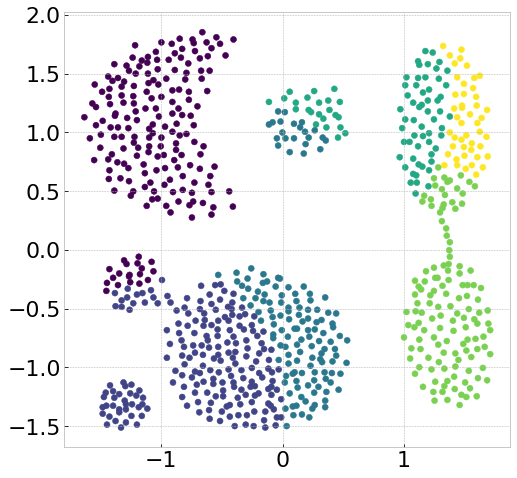

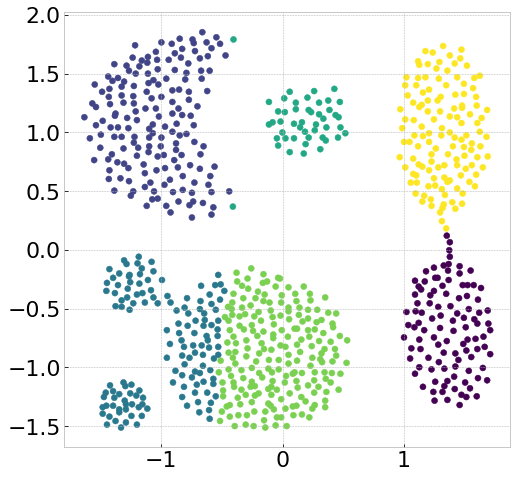


**************************dataset:  Compound.txt
data size: 399   the number of label: 6
the number of clusters used: 8

aggregation....
Silhouette score:0.43201077395916
Davies-Bouldin Index:0.792373652272281
Calinski_harabasz_score:329.5832450221133

kmeans++....
Silhouette score:0.3981038428834386
Davies-Bouldin Index:0.8694950328153157
Calinski_harabasz_score:656.395658392755


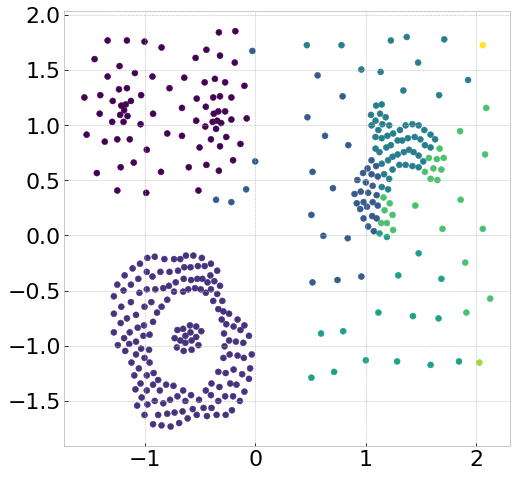

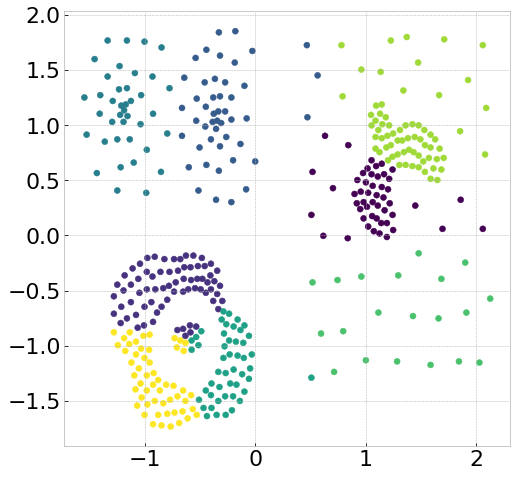


**************************dataset:  D31.txt
data size: 3100   the number of label: 31
the number of clusters used: 7

aggregation....
Silhouette score:0.2288587068532872
Davies-Bouldin Index:0.8831894787297385
Calinski_harabasz_score:1988.5320772478392

kmeans++....
Silhouette score:0.42096274959098295
Davies-Bouldin Index:0.8436856636825905
Calinski_harabasz_score:3591.3213820793203


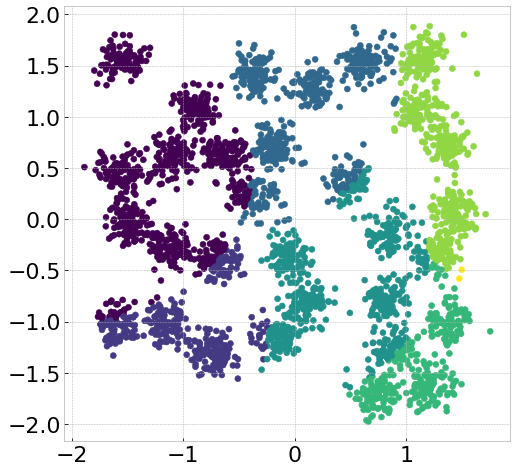

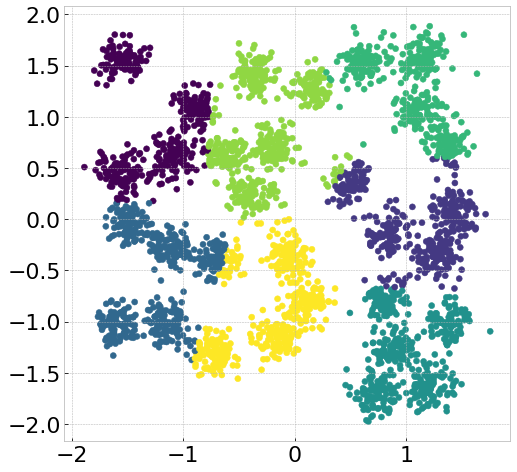


**************************dataset:  flame.txt
data size: 240   the number of label: 2
the number of clusters used: 8

aggregation....
Silhouette score:0.24921231199303115
Davies-Bouldin Index:0.8583648244819524
Calinski_harabasz_score:164.86115808213486

kmeans++....
Silhouette score:0.38074776609486155
Davies-Bouldin Index:0.7956172061689976
Calinski_harabasz_score:264.4975004103871


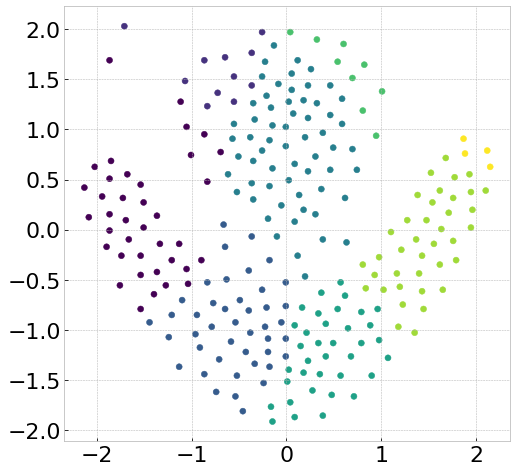

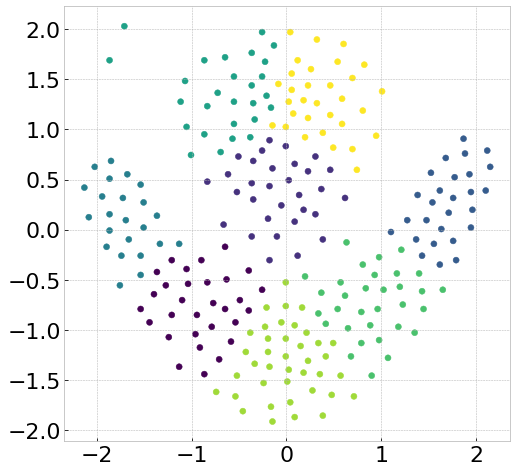


**************************dataset:  jain.txt
data size: 373   the number of label: 2
the number of clusters used: 6

aggregation....
Silhouette score:0.36372785264353674
Davies-Bouldin Index:0.7825458392663934
Calinski_harabasz_score:364.55364920298683

kmeans++....
Silhouette score:0.48576009950013455
Davies-Bouldin Index:0.6647491849661454
Calinski_harabasz_score:688.5800036907988


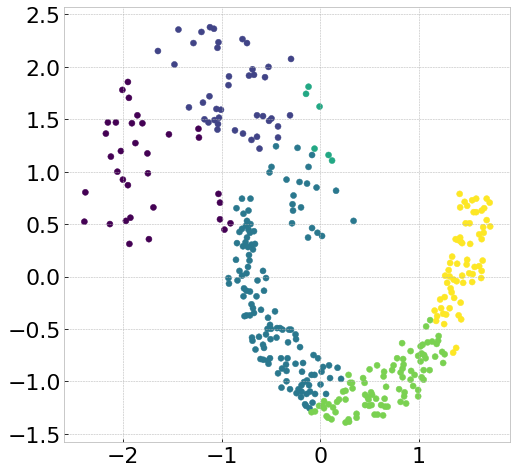

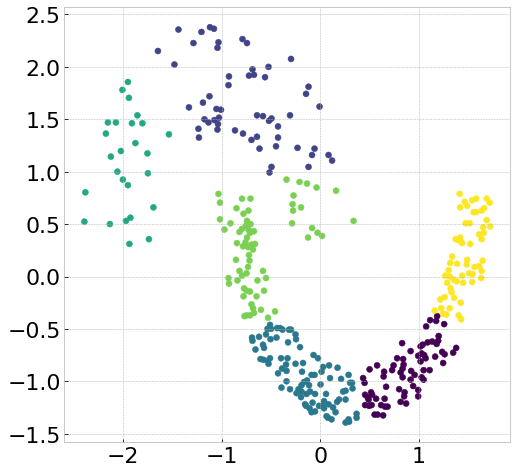


**************************dataset:  pathbased.txt
data size: 300   the number of label: 3
the number of clusters used: 8

aggregation....
Silhouette score:0.31026649810842744
Davies-Bouldin Index:0.7203468382153818
Calinski_harabasz_score:179.86396227434327

kmeans++....
Silhouette score:0.3691360835145125
Davies-Bouldin Index:0.8602665683923825
Calinski_harabasz_score:305.172464459372


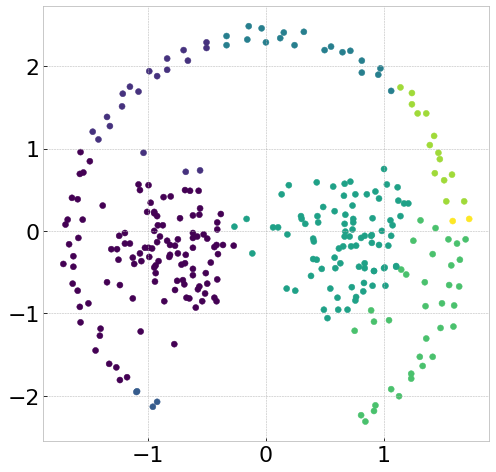

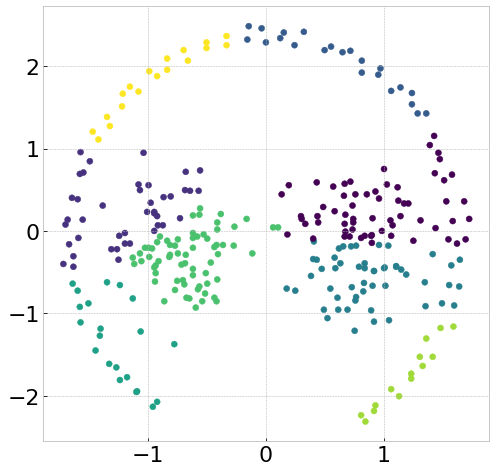


**************************dataset:  R15.txt
data size: 600   the number of label: 15
the number of clusters used: 8

aggregation....
Silhouette score:0.5474112228483808
Davies-Bouldin Index:0.5918188601761977
Calinski_harabasz_score:576.333659958433

kmeans++....
Silhouette score:0.653006125666107
Davies-Bouldin Index:0.3487277548679334
Calinski_harabasz_score:760.0819366111348


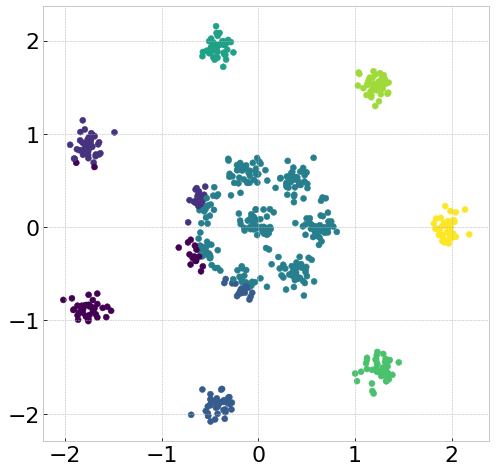

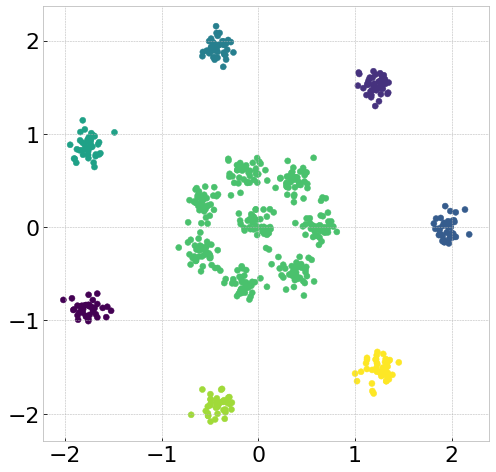


**************************dataset:  spiral.txt
data size: 312   the number of label: 3
the number of clusters used: 8

aggregation....
Silhouette score:0.2631542422026499
Davies-Bouldin Index:0.8280960391392813
Calinski_harabasz_score:165.0016891572899

kmeans++....
Silhouette score:0.3588334001784025
Davies-Bouldin Index:0.8599825381740496
Calinski_harabasz_score:246.0530857523666


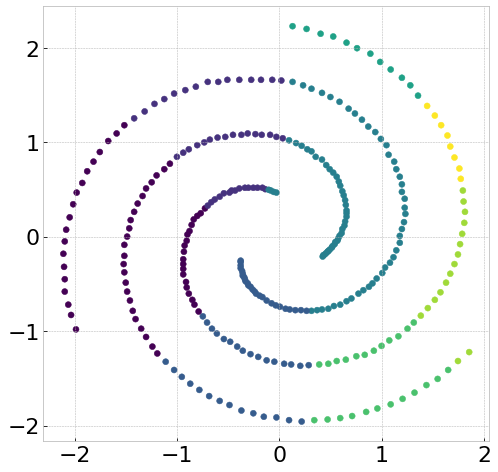

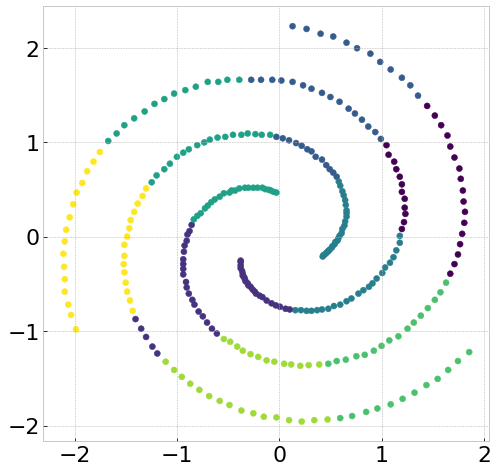

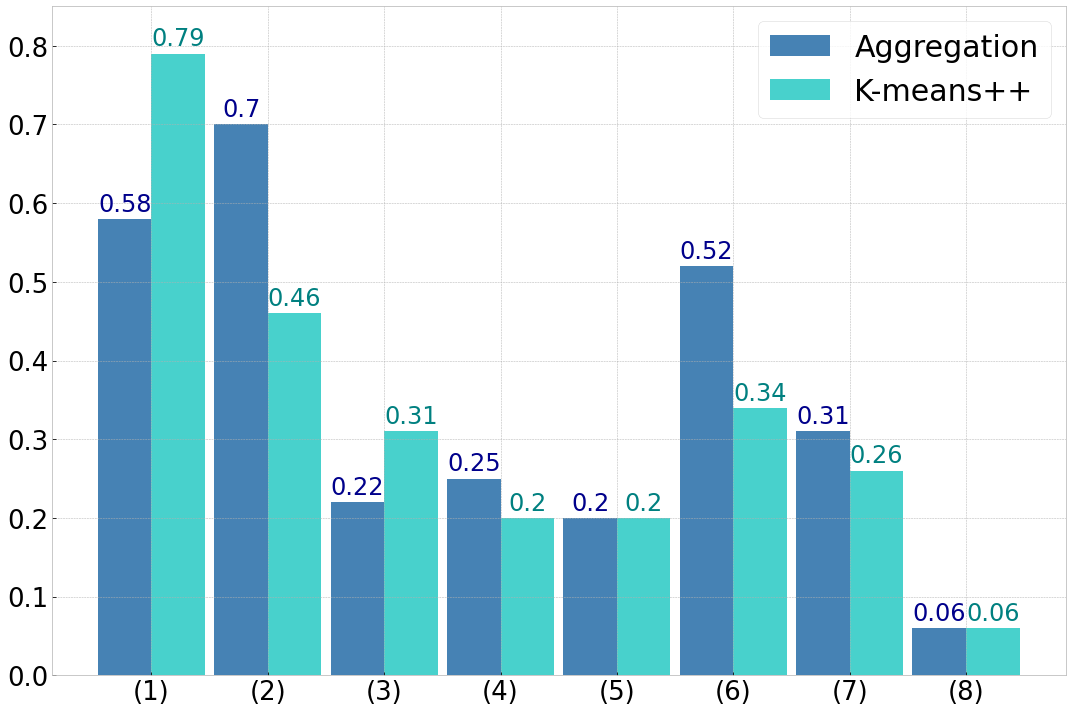

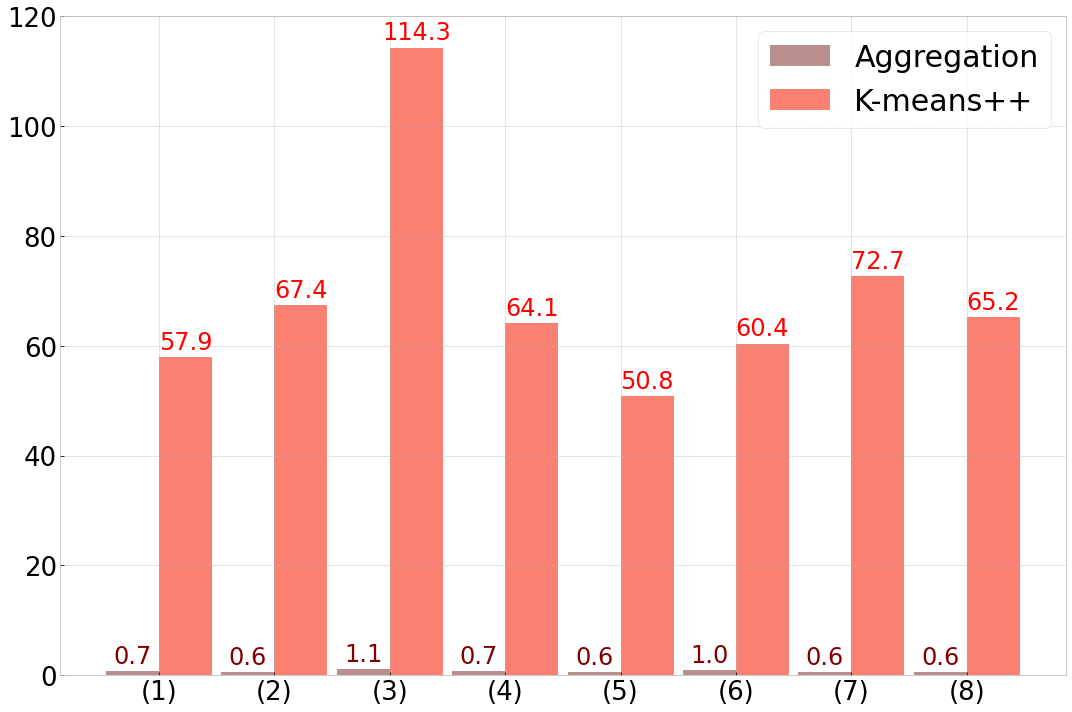

In [1]:
# The orginal files was executed on the jupyter notebook.
# !unzip datasets.zip
# a higher Silhouette Coefficient score relates to a model with better defined clusters.
# a lower Davies-Bouldin index relates to a model with better separation between the clusters.
# a higher Calinski-Harabasz score relates to a model with better defined clusters.
# a higher adjusted rand score relates to a better model
# This server was installed in September 2018 and has the following hardware specifications:
# Descriptions as belows:
# Dell PowerEdge R740 Server
# 2x Intel Xeon Silver 4114 2.2G (total 20 cores, 40 threads)
# 1.5 TB RAM (=1536 GB RAM)
# 1.8 TB disk space (expandable)

import time
import random
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from threadpoolctl import threadpool_limits
# from src.aggregation import Aggregation # python implementation
from src.cagg_memview import aggregate # cython with memory view
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

SEED = 0
labelsize = 26
np.random.seed(SEED)
random.seed(SEED)
plt.style.use('bmh')


def load_data(file):
    data = pd.read_csv(file,sep="\\s+", header = None)
    return data


shape_sets = [
    'Aggregation.txt',
    'Compound.txt',
    'D31.txt', 
    'flame.txt',
    'jain.txt', 
    'pathbased.txt',
    'R15.txt', 
    'spiral.txt'
]

dim_sets = [
    'dim032.txt',
    'dim064.txt', 
    'dim128.txt', 
    'dim256.txt', 
    'dim512.txt', 
    'dim1024.txt'
]

# Shape sets ====================================

TOL = 1.5
agg_sh_scores = list()
kmeans_sh_scores = list()
dbscan_sh_scores = list()

agg_db_scores = list()
kmeans_db_scores = list()
dbscan_db_scores = list()

agg_ch_scores = list()
kmeans_ch_scores = list()
dbscan_ch_scores = list()

agg_ri_scores = list()
kmeans_ri_scores = list()
dbscan_ri_scores = list()

agg_time_scores = list()
kmeans_time_scores = list()
dbscan_time_scores = list()

with threadpool_limits(limits=1, user_api='blas'):
    for i in range(len(shape_sets)):
        data = load_data("datasets/Shape sets/" + shape_sets[i])
        print('\n**************************dataset: ', shape_sets[i])

        print('data size:', len(data), ' ', 'the number of label:', len(np.unique(data[2])))
        data[[0,1]] = (data[[0,1]] - data[[0,1]].mean()) / data[[0,1]].std()

        st = time.time()
        # agg = Aggregation(sorting='lexi', tol=TOL, verbose=0)
        # agg.aggregate(data[[0,1]].values)
        agg_labels, splist, nr_dist = aggregate(data[[0,1]].values, sorting="lexi", tol=TOL)
        ed = time.time()
        agg_time_scores.append(ed - st)

        st = time.time()
        kmeans = KMeans(n_clusters=len(np.unique(agg_labels)), random_state=0, n_jobs=1, init='k-means++')
        kmeans.fit(data[[0,1]])
        ed = time.time()
        kmeans_time_scores.append(ed - st)

        #cython code
        print('the number of clusters used:', len(np.unique(agg_labels)))
        agg_sh = metrics.silhouette_score(data[[0,1]], agg_labels)
        agg_db = metrics.davies_bouldin_score(data[[0,1]], agg_labels)
        agg_ch = metrics.calinski_harabasz_score(data[[0,1]], agg_labels)
        agg_ri = metrics.adjusted_rand_score(data[2], agg_labels)

        # python code
        # print('the number of clusters used:', len(np.unique(agg.labels)))
        # agg_sh = metrics.silhouette_score(data[[0,1]], agg.labels)
        # agg_db = metrics.davies_bouldin_score(data[[0,1]], agg.labels)
        # agg_ch = metrics.calinski_harabasz_score(data[[0,1]], agg.labels)
        # agg_ri = metrics.adjusted_rand_score(data[2], agg.labels)

        kmeans_sh = metrics.silhouette_score(data[[0,1]], kmeans.labels_)
        kmeans_db = metrics.davies_bouldin_score(data[[0,1]], kmeans.labels_)
        kmeans_ch = metrics.calinski_harabasz_score(data[[0,1]], kmeans.labels_)
        kmeans_ri = metrics.adjusted_rand_score(data[2], kmeans.labels_)

        print("\naggregation....")
        print('Silhouette score:{}'.format(agg_sh)) 
        print('Davies-Bouldin Index:{}'.format(agg_db))
        print('Calinski_harabasz_score:{}'.format(agg_ch))

        print("\nkmeans++....")
        print('Silhouette score:{}'.format(kmeans_sh)) 
        print('Davies-Bouldin Index:{}'.format(kmeans_db))
        print('Calinski_harabasz_score:{}'.format(kmeans_ch))

        fig = plt.figure(figsize=(8,8))
        plt.rcParams['axes.facecolor'] = 'white'
        plt.scatter(data[0], data[1], c=agg_labels)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.grid(True)
        plt.savefig('results/analysis/agg_{}'.format(shape_sets[i])+'.pdf')
        plt.show()

        fig = plt.figure(figsize=(8,8))
        plt.rcParams['axes.facecolor'] = 'white'
        plt.scatter(data[0], data[1], c=kmeans.labels_)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.grid(True)
        plt.savefig('results/analysis/kmeans_{}'.format(shape_sets[i])+'.pdf')
        plt.show()

        agg_sh_scores.append(agg_sh)
        kmeans_sh_scores.append(kmeans_sh)

        agg_db_scores.append(agg_db)
        kmeans_db_scores.append(kmeans_db)

        agg_ch_scores.append(agg_ch)
        kmeans_ch_scores.append(kmeans_ch)

        agg_ri_scores.append(agg_ri)
        kmeans_ri_scores.append(kmeans_ri)

x = np.arange(len(shape_sets))  # the label locations
width = 0.46  # the width of the bars

font_size = 24
font = {'weight' : 'normal','size' : 30}

#overlap style
plt.style.use('tableau-colorblind10')
plt.style.use('bmh')

plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, np.round(agg_ri_scores,2), width, color='steelblue', label='Aggregation')
rects2 = ax.bar(x + width/2, np.round(kmeans_ri_scores,2), width, color='mediumturquoise', label='K-means++')
# rects3 = ax.bar(x + width/2, dbscan_sh, width, color='tomato', label='dbscan')

# Add some text for labels, title and custom x-axis tick labels, etc.
xlabels = ['('+str(i+1)+')' for i in range(len(shape_sets))] # [i.replace('.txt', '') for i in shape_sets]
# ax.set_ylabel('scores', fontsize=25)
# ax.set_title('Scores by k-means and GC')
ax.set_xticks(x)
ax.grid(True)
ax.legend(prop=font, loc = 'best')
ax.set_xticklabels(xlabels, fontsize=font_size)
ax.set_ylim([0, 0.85])
ax.tick_params(axis='both', which='major', labelsize=labelsize)

def autolabel(rects,c):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),color=c,
            xy=(rect.get_x() + rect.get_width() /2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points", fontsize=font_size,
            ha='center', va='bottom')


autolabel(rects1,c='darkblue')
autolabel(rects2,c='teal')

fig.tight_layout()
plt.savefig('results/analysis/shape_sets_ri'+'.pdf')
plt.show()


x = np.arange(len(shape_sets))  # the label locations
width = 0.46  # the width of the bars

font_size = 24
font = {'weight' : 'normal', 'size': 30}

plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, np.round(np.array(agg_time_scores)*10**3,1), width, color='rosybrown', label='Aggregation')
rects2 = ax.bar(x + width/2, np.round(np.array(kmeans_time_scores)*10**3,1), width, color='salmon', label='K-means++')
# rects3 = ax.bar(x + width/2, dbscan_sh, width, color='tomato', label='dbscan')

# Add some text for labels, title and custom x-axis tick labels, etc.
xlabels =  ['('+str(i+1)+')' for i in range(len(shape_sets))] # [i.replace('.txt', '') for i in shape_sets]
# ax.set_ylabel('time', fontsize=25)
# ax.set_title('Scores by k-means and GC')
ax.set_xticks(x)
ax.grid(True)
ax.legend(prop=font, loc = 'best')
ax.set_xticklabels(xlabels, fontsize=font_size)
ax.set_ylim([0, 120])
ax.tick_params(axis='both', which='major', labelsize=labelsize)

def autolabel(rects,c):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),color=c,
            xy=(rect.get_x() + rect.get_width() /2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points", fontsize=font_size,
            ha='center', va='bottom')


autolabel(rects1,c='maroon')
autolabel(rects2,c='r')

fig.tight_layout()
plt.savefig('results/analysis/shape_sets_time'+'.pdf')
plt.show()

## high-dimensional dataset


**************************dataset:  dim032.txt
data size: 1024
the number of clusters used: 9

dbcu....
Silhouette score:0.6522230249428362
Davies-Bouldin Index:0.6052067664613989
Calinski_harabasz_score:3300.787687777627

kmeans++....
Silhouette score:0.4969425011704674
Davies-Bouldin Index:1.3020282996863712
Calinski_harabasz_score:174.1911199468567

**************************dataset:  dim064.txt
data size: 1024
the number of clusters used: 9

dbcu....
Silhouette score:0.6907804966835245
Davies-Bouldin Index:0.4384741277152642
Calinski_harabasz_score:2785.80949324537

kmeans++....
Silhouette score:0.502168289268026
Davies-Bouldin Index:1.3956069390226835
Calinski_harabasz_score:147.5273022254598

**************************dataset:  dim128.txt
data size: 1024
the number of clusters used: 9

dbcu....
Silhouette score:0.5158864218082685
Davies-Bouldin Index:0.5542689859795187
Calinski_harabasz_score:2266.3597449659114

kmeans++....
Silhouette score:0.5402838885380266
Davies-Bouldin Ind

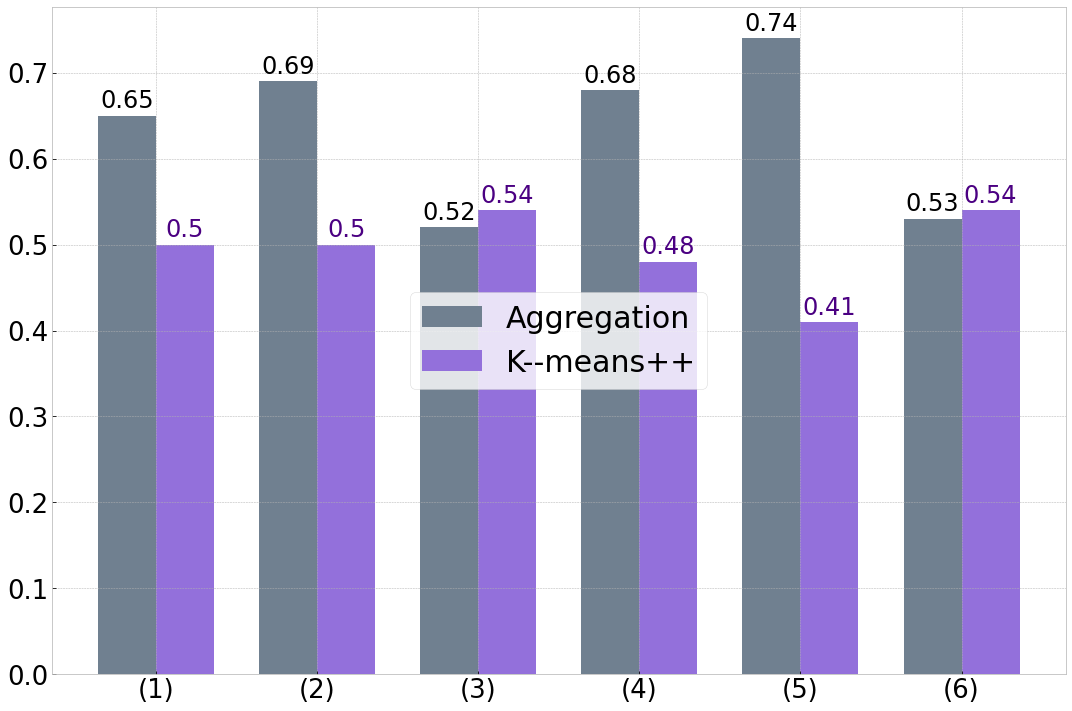

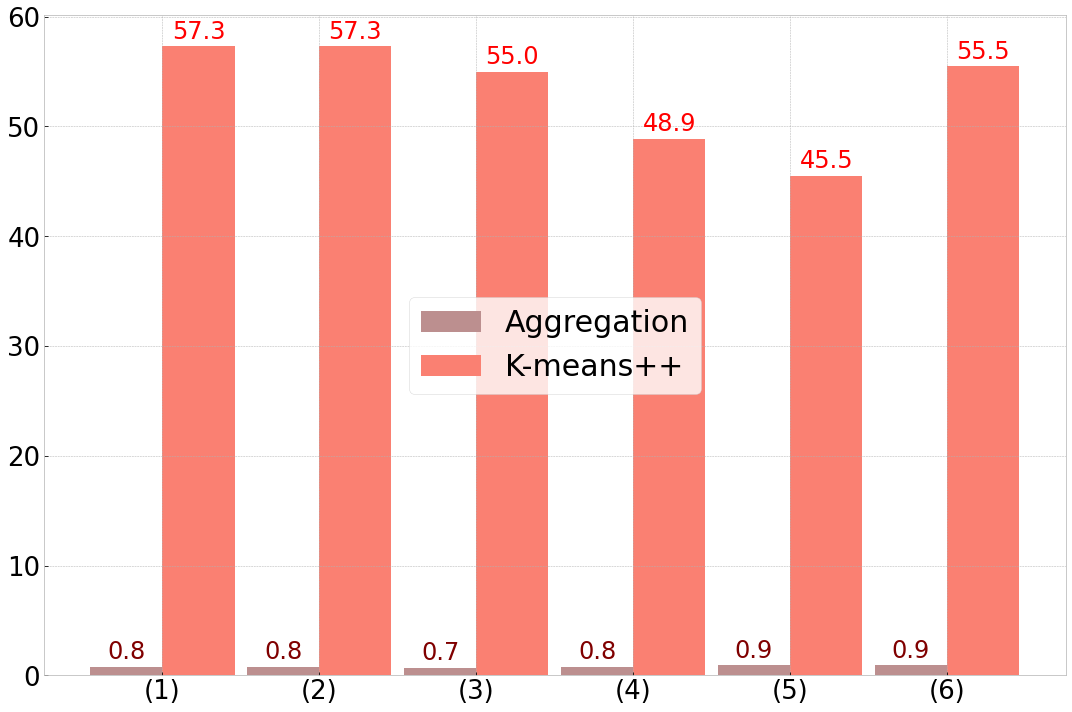

In [2]:
# DIM Sets (high dim) ====================================

TOL = 1

agg_sh_scores = list()
kmeans_sh_scores = list()
dbscan_sh_scores = list()

agg_db_scores = list()
kmeans_db_scores = list()
dbscan_db_scores = list()

agg_ch_scores = list()
kmeans_ch_scores = list()
dbscan_ch_scores = list()

agg_ri_scores = list()
kmeans_ri_scores = list()
dbscan_ri_scores = list()

agg_time_scores = list()
kmeans_time_scores = list()
dbscan_time_scores = list()

for i in range(len(dim_sets)):
    data = load_data("datasets/DIM-sets/" + dim_sets[i]) 
    print('\n**************************dataset: ', dim_sets[i])
    
    print('data size:', len(data))
    data = (data - data.mean()) / data.std()
    
    st = time.time()
    # agg = Aggregation(sorting='lexi', tol=TOL, verbose=0)
    # agg.aggregate(data[[0,1]].values)
    agg_labels, splist, nr_dist = aggregate(data[[0,1]].values, sorting="lexi", tol=TOL)
    ed = time.time()
    agg_time_scores.append(ed - st)
    
    st = time.time()
    kmeans = KMeans(n_clusters=len(np.unique(agg_labels)), random_state=0, n_jobs=1, init='k-means++')
    kmeans.fit(data[[0,1]])
    ed = time.time()
    kmeans_time_scores.append(ed - st)
    
    #cython code
    print('the number of clusters used:', len(np.unique(agg_labels)))
    agg_sh = metrics.silhouette_score(data[[0,1]], agg_labels)
    agg_db = metrics.davies_bouldin_score(data[[0,1]], agg_labels)
    agg_ch = metrics.calinski_harabasz_score(data[[0,1]], agg_labels)
    agg_ri = metrics.adjusted_rand_score(data[2], agg_labels)
    
    # python code
    # print('the number of clusters used:', len(np.unique(agg.labels)))
    # agg_sh = metrics.silhouette_score(data[[0,1]], agg.labels)
    # agg_db = metrics.davies_bouldin_score(data[[0,1]], agg.labels)
    # agg_ch = metrics.calinski_harabasz_score(data[[0,1]], agg.labels)
    # agg_ri = metrics.adjusted_rand_score(data[2], agg.labels)
    
    kmeans_sh = metrics.silhouette_score(data, kmeans.labels_)
    kmeans_db = metrics.davies_bouldin_score(data, kmeans.labels_)
    kmeans_ch = metrics.calinski_harabasz_score(data, kmeans.labels_)

    print("\ndbcu....")
    print('Silhouette score:{}'.format(agg_sh)) 
    print('Davies-Bouldin Index:{}'.format(agg_db))
    print('Calinski_harabasz_score:{}'.format(agg_ch))

    print("\nkmeans++....")
    print('Silhouette score:{}'.format(kmeans_sh)) 
    print('Davies-Bouldin Index:{}'.format(kmeans_db))
    print('Calinski_harabasz_score:{}'.format(kmeans_ch))

    agg_sh_scores.append(agg_sh)
    kmeans_sh_scores.append(kmeans_sh)
    
    agg_db_scores.append(agg_db)
    kmeans_db_scores.append(kmeans_db)
    
    agg_ch_scores.append(agg_ch)
    kmeans_ch_scores.append(kmeans_ch)

x = np.arange(len(dim_sets))  # the label locations
width = 0.36  # the width of the bars

font_size = 24
font = {'weight' : 'normal', 'size'   : 30}

plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, np.round(agg_sh_scores,2), width, color='slategray', label='Aggregation')
rects2 = ax.bar(x + width/2, np.round(kmeans_sh_scores,2), width, color='mediumpurple', label='K--means++')

xlabels =  ['('+str(i+1)+')' for i in range(len(dim_sets))] # [i.replace('.txt', '') for i in dim_sets]
# ax.set_ylabel('scores', fontsize=25)
ax.set_xticks(x)
ax.grid(True)
ax.legend(prop=font, loc = 'center')
ax.set_xticklabels(xlabels, fontsize=font_size)
ax.tick_params(axis='both', which='major', labelsize=labelsize)

def autolabel(rects,c):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),color=c,
            xy=(rect.get_x() + rect.get_width() /2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points", fontsize=font_size,
            ha='center', va='bottom')


autolabel(rects1,c='k')
autolabel(rects2,c='indigo')

fig.tight_layout()
plt.savefig('results/analysis/dim_sets_sh'+'.pdf')
plt.show()


x = np.arange(len(dim_sets))
width = 0.46  

font_size = 24
font = {'weight' : 'normal', 'size': 30}

plt.style.use('tableau-colorblind10')
plt.rcParams['axes.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, np.round(np.array(agg_time_scores)*10**3,1), width, color='rosybrown', label='Aggregation')
rects2 = ax.bar(x + width/2, np.round(np.array(kmeans_time_scores)*10**3,1), width, color='salmon', label='K-means++')

xlabels =  ['('+str(i+1)+')' for i in range(len(dim_sets))] # [i.replace('.txt', '') for i in dim_sets]
# ax.set_ylabel('time', fontsize=25)
ax.set_xticks(x)
ax.grid(True)
ax.legend(prop=font, loc = 'center')
ax.set_xticklabels(xlabels, fontsize=font_size)
ax.tick_params(axis='both', which='major', labelsize=labelsize)

def autolabel(rects,c):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),color=c,
            xy=(rect.get_x() + rect.get_width() /2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points", fontsize=font_size,
            ha='center', va='bottom')


autolabel(rects1,c='maroon')
autolabel(rects2,c='r')

fig.tight_layout()
plt.savefig('results/analysis/dim_sets_time'+'.pdf')
plt.show()